### Linear Regression

Linear regression is a supervised learning algorithm where it predicts a dependent variable or target based on the given independent variables. In essence, it helps find the relationship between a dependent variable and independent variables.


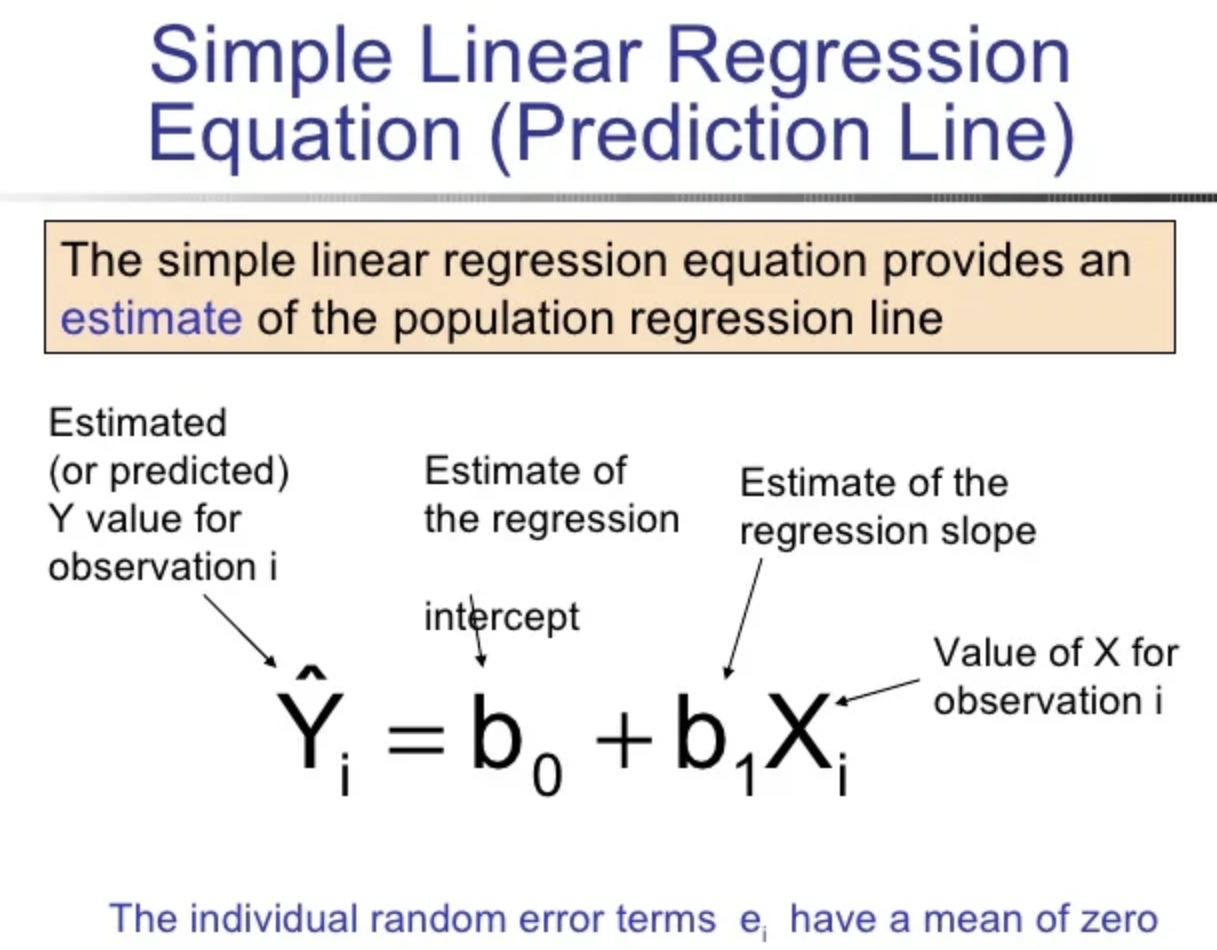

In [34]:

from IPython.display import Image
Image(filename = '/Users/mburley/Downloads/Screen Shot 2024-01-30 at 7.54.40 PM.png', width = 500, height = 200)


### Linear Regression Model

Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. These estimators define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ. This function should capture the dependencies between the inputs and output sufficiently well.

The estimated or predicted response, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding actual response 𝑦ᵢ. The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the residuals. Regression is about determining the best predicted weights—that is, the weights corresponding to the smallest residuals.

To get the best weights, you usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². This approach is called the method of ordinary least squares.

In [44]:
### Library Imports

import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf 
from datetime import timedelta
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.style.use('fivethirtyeight')

In [36]:
### Import the Stock Info

ticker = 'GOOG'
start_date = '2018-1-1'

data = yf.Ticker(ticker)
# Fetch historical data starting from the specified start_date
history = data.history(start = start_date)
df = pd.DataFrame(history)
# Reset index to make headings in the same row
df.reset_index(inplace = True)
# Convert the date column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])
# Extract only the date part
df['Date'] = df['Date'].dt.date
# Drop 'Dividends' and 'Stock Splits' columns
#df.drop(['Dividends', 'Stock Splits'], axis = 1)

#date = df['Date']

df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [37]:
### Splitting Data to Training Set

# Assuming x is a DataFrame containing independent variables, and y is a Series containing the dependent variable
x = df[['Open','High','Low','Volume']]
y = df['Close']   

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, shuffle = False, random_state = 0)

# Check if total observations is appropriate
print(train_x.shape) 
print(train_y.shape)
# 20% of total observations
print(test_x.shape) 
print(test_y.shape)



(1233, 4)
(1233,)
(309, 4)
(309,)


In [38]:
### Regression Coefficient and Intercept Calculation

# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(train_x, train_y)

# Display the coefficients and intercept
print("Regression Coefficients:", model.coef_)
print("Regression Intercept:", model.intercept_)


Regression Coefficients: [-6.34865809e-01  7.89507485e-01  8.45710339e-01  5.98771144e-10]
Regression Intercept: -0.0019252861874008431


In [39]:
### Predicted Values

# Predict the target values for the test set
predicted = model.predict(test_x)

# Create a DataFrame to store actual and predicted values along with dates
updated_df = pd.DataFrame({'Actual': test_y, 'Predicted': predicted})

# Assuming you have a DataFrame named df containing the dates
# Add the date column to your existing DataFrame
updated_df['Date'] = df.iloc[test_x.index]['Date'].values

# Print or use the sorted DataFrames as needed
print(updated_df)

          Actual   Predicted        Date
1233   98.820000   98.747917  2022-11-23
1234   97.599998   98.087146  2022-11-25
1235   96.250000   96.633763  2022-11-28
1236   95.440002   94.990289  2022-11-29
1237  101.449997   99.792449  2022-11-30
...          ...         ...         ...
1537  148.729996  149.601221  2024-02-12
1538  146.369995  146.873793  2024-02-13
1539  147.139999  146.258129  2024-02-14
1540  143.940002  142.579844  2024-02-15
1541  142.195007  142.037248  2024-02-16

[309 rows x 3 columns]


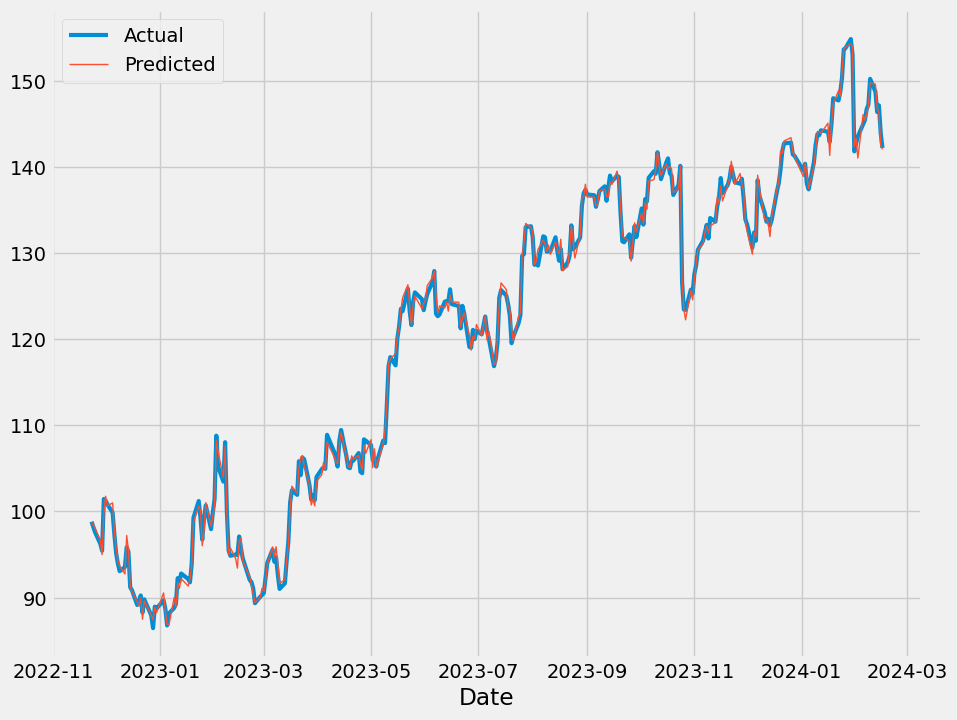

In [40]:
### Plotting Function

# Plot both actual and predicted data on the same graph
ax = updated_df.plot(x = 'Date', y = 'Actual', figsize = (10, 8), linewidth = 3)
updated_df.plot(x = 'Date', y = 'Predicted', ax = ax, linewidth = 1)
plt.show()


### The Coefficient of Determination R²

Here we will compute the coefficient of determination denoted by R², which takes values between 0 and 1, the higher the value R² the more successful the linear regression is at explaining the variation of Y values, in our case the Y values represent the close stock prices of the subjected company. The below is the math behind The coefficient of determination R²

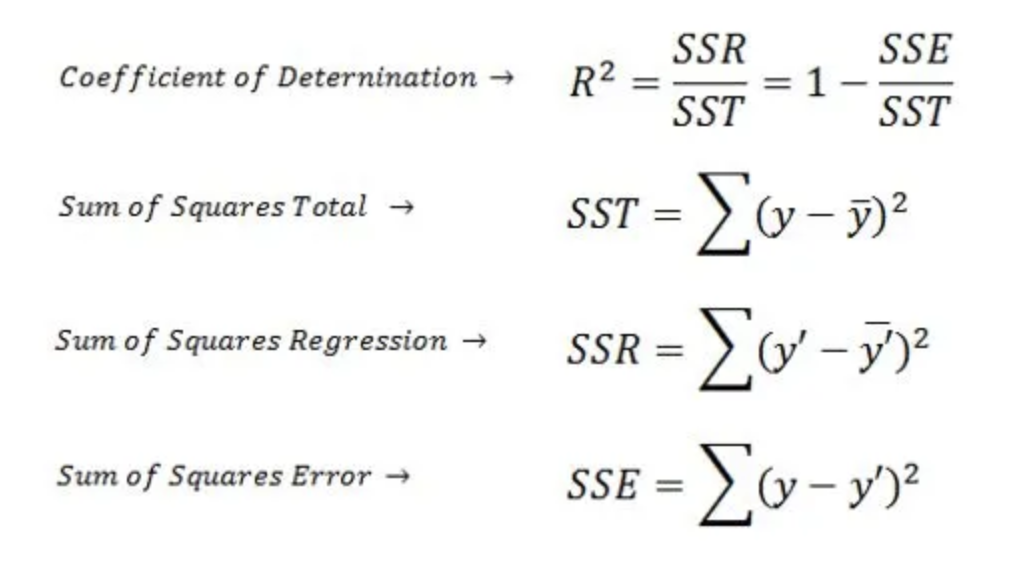

In [41]:

from IPython.display import Image
Image(filename='/Users/mburley/Downloads/Screen Shot 2024-01-30 at 8.16.25 PM.png', width = 500, height = 200)


In [42]:
### The Coefficient of Determination R²

# Calculate R-squared score on the testing set
r_squared = model.score(test_x, test_y)
print("R-squared score:", r_squared)

R-squared score: 0.9985709639996687


In [79]:
### Autoregression Model

## Split the data into train and test 
n = len(df)
n_train = int(0.8 * n) # Set the train data set to 80% of the total df
n_test = n - n_train
# Create train and test dataframes
train_df, test_df = df[:n_train], df[n_train:]

## Train the autoregression model (using already trained and tested split dataframes)
model = AutoReg(train_df['Close'], lags=5)
model_fit = model.fit()

## Make predictions
predictions = model_fit.predict(start=len(train_df), end=(len(train_df) + len(test_df) - 1), dynamic=False)
forecast_period = len(test_df)
forecast_dates = pd.date_range(start=test_df['Date'].iloc[0], periods=forecast_period, freq='B')  # Exclude the first date

## Combine forecasted dates with the predicted values
prediction_df = pd.DataFrame({'Date': forecast_dates, 'Predicted': predictions})
prediction_df


,Date,Predicted
1233,2022-11-23,97.295408
1234,2022-11-24,97.416813
1235,2022-11-25,97.376593
1236,2022-11-28,97.382384
1237,2022-11-29,97.395391
...,...,...
1537,2024-01-23,101.404825
1538,2024-01-24,101.415340
1539,2024-01-25,101.425838
1540,2024-01-26,101.436320
